<a href="https://colab.research.google.com/github/Kartikee12/DAV/blob/main/Exp3_DAV_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** Multiple Linear Regression in Python and R.

**Theory :**


Multiple Linear Regression (MLR) is a statistical technique that extends the concept of Simple Linear Regression by considering the influence of multiple independent variables on a dependent variable. Studying Multiple Linear Regression is essential for several reasons:

**1) Real-world Complexity:**

Many real-world phenomena are influenced by multiple factors simultaneously. MLR allows us to model and understand the complex relationships among multiple variables.

**2) Enhanced Predictive Power:**

MLR can provide more accurate predictions than Simple Linear Regression when the relationship between the dependent variable and multiple independent variables is considered. It takes into account the combined effect of several factors.

**3) Identifying Significant Variables:**

MLR helps in identifying which independent variables are statistically significant in predicting the dependent variable. This information is crucial for understanding the key drivers of the observed outcomes.

**4) Adjusting for Confounding Variables:**

MLR enables the control of confounding variables by including them in the model. This is important when there are potential lurking variables that might affect the relationship between the variables of interest.

**5) Model Interpretability:**

MLR allows for a comprehensive examination of the relationships between the dependent variable and each independent variable, including their individual impact and interactions. This enhances the interpretability of the model.

**6) Assumption Testing:**

MLR requires certain assumptions to be met for the results to be valid. Studying MLR involves understanding and testing these assumptions, such as linearity, independence, homoscedasticity, and normality, to ensure the reliability of the model.

**7) Business and Scientific Applications:**

MLR is widely used in various fields, including economics, finance, social sciences, biology, and engineering. Understanding MLR is essential for researchers, analysts, and practitioners working in these domains.

**8) Multicollinearity and Variable Selection:**

MLR introduces challenges like multicollinearity, where independent variables are correlated. Studying MLR helps in addressing multicollinearity issues and choosing the most relevant variables for the model.

**9) Model Evaluation and Diagnostics:**

Learning MLR involves understanding how to evaluate the performance of the model, conduct diagnostics, and make necessary adjustments. This includes assessing goodness-of-fit, residual analysis, and addressing potential issues in the model.

**10) Foundation for Advanced Models:**

MLR serves as a foundational concept for more advanced modeling techniques, such as multiple logistic regression, hierarchical linear modeling, and machine learning algorithms that involve multiple predictors.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('weatherHistory.csv')

In [4]:
print(data.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18461 entries, 0 to 18460
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            18461 non-null  object 
 1   Summary                   18460 non-null  object 
 2   Precip Type               18460 non-null  object 
 3   Temperature (C)           18460 non-null  float64
 4   Apparent Temperature (C)  18460 non-null  float64
 5   Humidity                  18460 non-null  float64
 6   Wind Speed (km/h)         18460 non-null  float64
 7   Wind Bearing (degrees)    18460 non-null  float64
 8   Visibility (km)           18460 non-null  float64
 9   Loud Cover                18460 non-null  float64
 10  Pressure (millibars)      18460 non-null  float64
 11  Daily Summary             18460 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None


In [6]:
print(data.describe())


       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     18460.000000              18460.000000  18460.000000   
mean         11.831738                 10.794448      0.724785   
std           9.431906                 10.487281      0.192096   
min         -14.088889                -22.094444      0.130000   
25%           4.866667                  2.450000      0.600000   
50%          11.644444                 11.644444      0.770000   
75%          18.662500                 18.662500      0.880000   
max          39.905556                 38.377778      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       18460.000000            18460.000000     18460.000000     18460.0   
mean           10.552023              191.896154        10.143651         0.0   
std             6.785348              105.609461         3.749637         0.0   
min             0.000000                0.000000         0.000000         0.0   


In [7]:
print(data.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')

y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)



LinearRegression()

In [23]:
r_squared = model.score(X_test_imputed, y_test)
intercept = model.intercept_
coefficients = model.coef_

print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")




R-squared: 0.9899228106222913
Intercept: -1.9213558542120666
Coefficients: [ 1.11923099e+00  9.79028711e-01 -1.01915516e-01 -1.61124734e-04]


In [24]:
y_pred = model.predict(X_test_imputed)



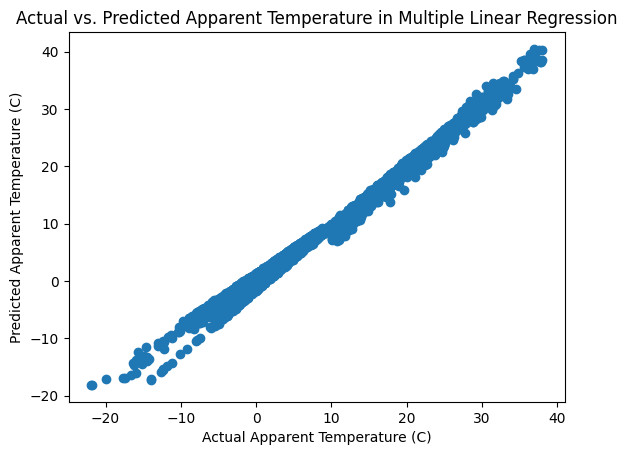

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Apparent Temperature (C)")
plt.ylabel("Predicted Apparent Temperature (C)")
plt.title("Actual vs. Predicted Apparent Temperature in Multiple Linear Regression")
plt.show()

In [28]:
%load_ext rpy2.ipython

In [29]:
%%R
# Install and load necessary packages
install.packages(c("tidyverse", "caTools", "ggplot2"))
library(tidyverse)
library(caTools)
library(ggplot2)



(as ‘lib’ is unspecified)
























	‘/tmp/Rtmpq7fcjN/downloaded_packages’



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


  replacement has 0 rows, data has 96453


 




Error in `$<-.data.frame`(`*tmp*`, Temperature.C, value = numeric(0)) : 
  replacement has 0 rows, data has 96453


In [31]:
%%R
data <- read.csv("weatherHistory.csv")

In [32]:
%%R
summary(data)

 Formatted.Date       Summary          Precip.Type        Temperature..C.  
 Length:96453       Length:96453       Length:96453       Min.   :-21.822  
 Class :character   Class :character   Class :character   1st Qu.:  4.689  
 Mode  :character   Mode  :character   Mode  :character   Median : 12.000  
                                                          Mean   : 11.933  
                                                          3rd Qu.: 18.839  
                                                          Max.   : 39.906  
 Apparent.Temperature..C.    Humidity      Wind.Speed..km.h.
 Min.   :-27.717          Min.   :0.0000   Min.   : 0.000   
 1st Qu.:  2.311          1st Qu.:0.6000   1st Qu.: 5.828   
 Median : 12.000          Median :0.7800   Median : 9.966   
 Mean   : 10.855          Mean   :0.7349   Mean   :10.811   
 3rd Qu.: 18.839          3rd Qu.:0.8900   3rd Qu.:14.136   
 Max.   : 39.344          Max.   :1.0000   Max.   :63.853   
 Wind.Bearing..degrees. Visibility..km.  

In [38]:
%%R
model <- lm(Apparent.Temperature..C. ~ Temperature..C. + Humidity + Wind.Speed..km.h. + Pressure..millibars., data = data)

In [40]:
%%R
r_squared <- summary(model)$r.squared
intercept <- coef(model)[1]
coefficients <- coef(model)[-1]


cat("R-squared:", r_squared, "\n")
cat("Intercept:", intercept, "\n")
cat("Coefficients:", coefficients, "\n")

R-squared: 0.9898173 
Intercept: -2.530049 
Coefficients: 1.12596 1.057306 -0.09469555 0.0001954374 


In [41]:
%%R
predicted_values <- predict(model, newdata = data)


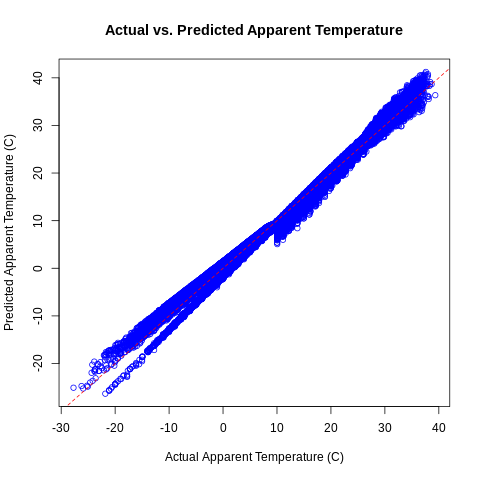

In [42]:
%%R
plot(data$Apparent.Temperature..C., predicted_values, main = "Actual vs. Predicted Apparent Temperature",
     xlab = "Actual Apparent Temperature (C)", ylab = "Predicted Apparent Temperature (C)", col = "blue")
abline(0, 1, col = "red", lty = 2)